# Klasifikasi Emosi Suatu Teks


Klasifikasi emosi teks adalah masalah pemberian emosi pada teks dengan memahami konteks dan emosi di balik teks. Salah satu contoh dunia nyata adalah keyboard iPhone yang merekomendasikan emoji paling relevan dengan memahami teksnya. Jadi, jika kita ingin mempelajari cara mengklasifikasikan emosi suatu teks, disini tempatnya.


Klasifikasi emosi teks adalah masalah pemrosesan bahasa alami dan klasifikasi teks. Di sini kita perlu melatih model klasifikasi teks untuk mengklasifikasikan emosi dari sebuah teks.

Untuk mengatasi masalah ini, kita membutuhkan data teks berlabel dan emosinya. Kita akan mencari kumpulan data (dataset) yang ideal untuk mengatasi masalah ini di Kaggle (https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp).

Disini, kita akan melatih model klasifikasi teks untuk tugas Klasifikasi Emosi Teks menggunakan Pembelajaran Mesin (Machine Learning) dan bahasa pemrograman Python.


In [27]:
# Langkah awal kita import libraries yang diperlukan
import pandas as pd
import numpy as np
import keras
import tensorflow
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense


In [28]:
# Load dataset training, yaitu 'train.txt'
data = pd.read_csv("train.txt", sep=';')
data.columns = ["Text", "Emotions"]
print(data.head())


                                                Text Emotions
0  i can go from feeling so hopeless to so damned...  sadness
1   im grabbing a minute to post i feel greedy wrong    anger
2  i am ever feeling nostalgic about the fireplac...     love
3                               i am feeling grouchy    anger
4  ive been feeling a little burdened lately wasn...  sadness


In [12]:
# Karena ini adalah masalah pemrosesan bahasa alami (natural language processing),
# kita mulai dengan menandai (tokenizing) datanya
texts = data["Text"].tolist()
labels = data["Emotions"].tolist()

# Tokenize datanya (teks)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)


Sekarang kita perlu melapisi urutan dengan panjang yang sama untuk memasukkannya ke dalam jaringan saraf (*neural netowork*). Inilah cara kita dapat mengisi urutan teks agar memiliki panjang yang sama.


In [13]:
sequences = tokenizer.texts_to_sequences(texts)
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length)


Sekarang kita akan menggunakan metode label encoder untuk mengkonversi kelas dari string menjadi representasi numerik.


In [14]:
# Encode label string ke integer
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)


Kita sekarang akan mengkodekan label One-hot. One hot encoding mengacu pada transformasi label kategorikal menjadi representasi biner di mana setiap label direpresentasikan sebagai vektor dari semua nol kecuali satu 1. Ini diperlukan karena algoritma pembelajaran mesin (*machine learning*) bekerja dengan data numerik. Jadi, inilah cara kita dapat menyandikan label dengan One-hot.


In [15]:
# One-hot encode the labels
one_hot_labels = keras.utils.to_categorical(labels)


Sekarang kita akan membagi data menjadi set pelatihan dan pengujian.


In [16]:
# Split (belah) data menjadi dataset training dan testing
xtrain, xtest, ytrain, ytest = train_test_split(padded_sequences, one_hot_labels, test_size=0.2)


Sekarang mari kita definisikan arsitektur jaringan saraf untuk masalah klasifikasi kita dan gunakan untuk melatih model untuk mengklasifikasikan emosi.


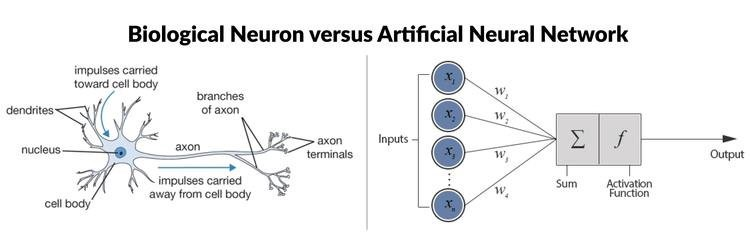

In [17]:
# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, 
                    output_dim=128, input_length=max_length))
model.add(Flatten())
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=len(one_hot_labels[0]), activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(xtrain, ytrain, epochs=10, batch_size=32, validation_data=(xtest, ytest))


Epoch 1/10
400/400 [==============================] - 18s 43ms/step - loss: 1.3825 - accuracy: 0.4557 - val_loss: 0.9029 - val_accuracy: 0.6869
Epoch 2/10
400/400 [==============================] - 17s 42ms/step - loss: 0.4017 - accuracy: 0.8745 - val_loss: 0.5158 - val_accuracy: 0.8278
Epoch 3/10
400/400 [==============================] - 17s 43ms/step - loss: 0.0715 - accuracy: 0.9820 - val_loss: 0.5352 - val_accuracy: 0.8397
Epoch 4/10
400/400 [==============================] - 16s 41ms/step - loss: 0.0266 - accuracy: 0.9946 - val_loss: 0.5935 - val_accuracy: 0.8344
Epoch 5/10
400/400 [==============================] - 16s 41ms/step - loss: 0.0164 - accuracy: 0.9967 - val_loss: 0.6336 - val_accuracy: 0.8266
Epoch 6/10
400/400 [==============================] - 19s 46ms/step - loss: 0.0119 - accuracy: 0.9977 - val_loss: 0.6706 - val_accuracy: 0.8250
Epoch 7/10
400/400 [==============================] - 17s 42ms/step - loss: 0.0106 - accuracy: 0.9977 - val_loss: 0.6886 - val_accuracy:

Epoch adalah ketika seluruh dataset sudah melalui proses training pada Jaringan Syaraf (Neural Netwok) sampai dikembalikan ke awal untuk sekali putaran, karena satu Epoch terlalu besar untuk dimasukkan (feeding) kedalam komputer maka dari itu kita perlu membaginya kedalam satuan kecil (batches).

Tapi, mengapa kita perlu lebih dari satu Epoch? Kita tahu itu tidak masuk akal di awal bahwa melewati seluruh dataset melalui jaringan saraf tidak cukup dan kita perlu melewati dataset penuh beberapa kali ke jaringan saraf yang sama. Namun perlu diingat bahwa kita menggunakan dataset yang terbatas dan untuk mengoptimalkan pembelajaran dan grafik yang kita gunakan adalah Gradient Descent yang merupakan proses iteratif. Jadi, mengupdate weight (bobot) dengan satu epoch saja tidak cukup.

Satu epoch mengarah pada underfitting pada grafik. Seiring bertambahnya jumlah epoch, semakin banyak pula bobot (**weight**) yang berubah dalam Jaringan Syaraf (**Neural Network**) dan kurvanya melengkung dari kurva yang kurang sesuai hingga selaras dengan kurva yang overfitting.


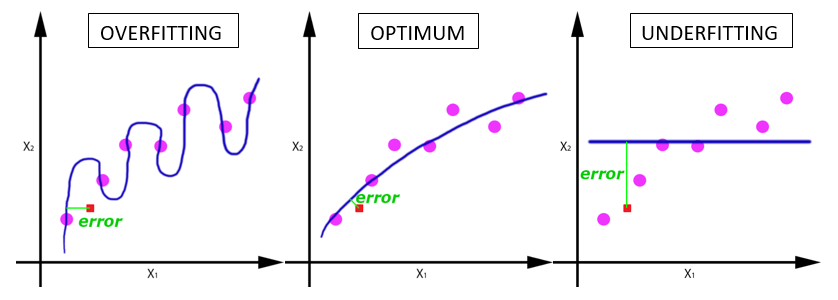

Sekarang mari kita ambil kalimat sebagai teks masukan dan lihat bagaimana kinerja model.


In [26]:
# input_text = "She didn't come today because she lost her dog yestertay!"
# input_text = "i posted on my facebook page earlier this week ive been feeling a little grumpy and out of sorts the past few days"
input_text = "i feel shocked and sad at the fact that there are so many sick people"

# Pre-processing teks input
input_sequence = tokenizer.texts_to_sequences([input_text])
padded_input_sequence = pad_sequences(input_sequence, maxlen=max_length)
prediction = model.predict(padded_input_sequence)
predicted_label = label_encoder.inverse_transform([np.argmax(prediction[0])])
print(predicted_label)


1/1 [==============================] - 0s 24ms/step
['surprise']


Jadi beginilah cara menggunakan Machine Learning untuk tugas klasifikasi emosi teks menggunakan bahasa pemrograman Python.


Klasifikasi emosi teks adalah masalah pemberian emosi pada teks dengan memahami konteks dan emosi di balik teks. Salah satu contoh dunia nyata adalah keyboard iPhone yang merekomendasikan emoji paling relevan dengan memahami teksnya. 
